# <div align="center">  MACS207b - OFDMA </div>

### Homework of Inès ENNIGROU - Kriss GUTIERREZ ANCO - Marion HUBLER

**Aim :** In this labwork, our aim is to modelize the users of an antenna as distributed according to a Poisson Process of intensity $\lambda$ on a circle of radius $R$, whose center is occupied by said antenna. By considering the active users among them, our goal is to modelize the distribution of the cumulative number of required subcarriers by all the users in the cell, to study the outage probability, that is the probability for the users to require more subcarriers than the available ones 

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
## Numerical values for the problem

C = 200 #kb/s 
W = 250 #kHz 
K = 1e+06 #su
Gamma = 2.8 #su
R = 300 #m
Lambda = 0.01 #m^-2
SINRmin = 0.1 #su
p = 0.01 #su

____

### Question 1

We know that the users are sampled with respect to a Poisson Point Process of intensity measure $\lambda dx$. According to the thinning theorem **(Theorem 5.7)** applied to the Poisson Process of the users ($ U \sim \mathcal{PPP}(\lambda dx)$), we get that the **active users** follow a Poisson Process of intensity $d\mu = p\lambda dx$ that is : $ \boxed{AU \sim \mathcal{PPP}(p\lambda dx)} $

____

### Question 2

We know that the number of **active users** $AU \sim \mathcal{PPP}(p\lambda dx)$, and want the average number of users on the cell which is a disk of area $\pi R^2 $, which means the mean number of active customers in the cell is $ \boxed{p \lambda \pi R^2}$

In [5]:
## Numerical application 

number_active_users = p * Lambda * np.pi * R**2
print("The number of active users is ", number_active_users)

The number of active users is  28.274333882308138


____

### Question 3

The function that to an atom associates the number of subcarriers it requires has the following properties :
- it takes integer values $\implies$ the areas are well defined
- it depends on $x$ only through the value of its **euclidian norm** $||x|| \implies$ the areas are concentric circles
- is an increasing function of $||x||$ (since $\mathcal{ln}(1+\frac{1}{x})$ is a decreasing function of $||x||$) $\implies$ the further an atom $x$ is from the source, the more subcarriers it requires

In fact we can even plot the curve : 

C:\Users\ASPIRE 5\AppData\Local\Temp\ipykernel_1284\3653585205.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return math.ceil(C / (W * np.log2(1+K/r**Gamma)))


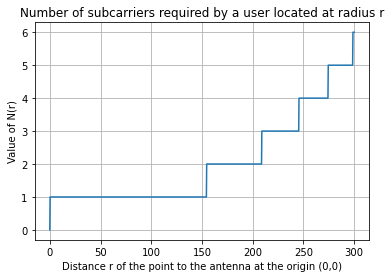

In [6]:
def N(r):
    return math.ceil(C / (W * np.log2(1+K/r**Gamma)))
                
Rad = np.linspace(0, 300, 1000)
Requests = [N(r) for r in Rad]

plt.figure()
plt.plot(Rad, Requests)
plt.xlabel('Distance r of the point to the antenna at the origin (0,0)')
plt.ylabel('Value of N(r)')
plt.title('Number of subcarriers required by a user located at radius r')
plt.grid()
plt.show()

So the subset of the cell in which all customers require k subcarriers is a **ring** between the two radius :
- $radius_{inner} = max||N^{-1}(k-1)||$
- $radius_{outer} = max||N^{-1}(k)||$

____

### Question 4

We established :
$$r_2 =  \max\{||x||: x\in\mathbb{R}^2,\,\, N(x) = 2\}$$
$$r_3 =  \max\{||x||: x\in\mathbb{R}^2,\,\, N(x) = 3\}$$


then from **Question 3** we know that the users who request 3 subcarriers are the active users located in the ring with inner radius $r_2$ and outer radius $r_3$ which we call $S_3$, then we apply **Theorem 5.3** on $AU\sim PPP(p\lambda dx)$, where $dx$ is the Lebesgue measure on $\mathbb{R}^2$ then $AU(S_3)$ follows a **Poisson Distribution** with parameter:

$$\mu_3 = p\lambda.Area(S_3) = p\lambda.(\pi.r_3^2 - \pi.r_2^2) = p\lambda\pi.(r_3^2-r_2^2)$$

$$ \boxed{A_3 \sim \mathcal{Pois}(\mu_3)} $$

____

### Question 5

The idea would be to sample a Poisson Process of parameter $p\lambda$ on the disk. Then, count the number of atoms $x$, such that $N(x) = 3$. **That will give us the value taken by A3 on this instance.** 

Then repeat the process for an arbitrary but large enough number of sampled points according to a Poisson Process of parameter $p\lambda$.

Put all the instances of the value of A3 in a list and then run a Kolmogorov-Smironov test on these samples, commparing it to a Poisson distribution of intensity $\mu_3$. 

The output will be a number between zero and one, infirming or confimring the fit between the ditributions.

In [9]:
def SimulatePoints():
    x0 = (0,0)
    cellArea = np.pi*R**2
 
    #Simulate Poisson point process
    nbPoints = np.random.poisson(p*Lambda*areaTotal)
    theta=2*np.pi*np.random.uniform(0,1,nbPoints) 
    r=R*np.sqrt(np.random.uniform(0,1,nbPoints)) 
 
    #Get Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)
 
    return x,y

In [8]:
# Samle Points

x,y = SimulatePoints()

# Outer circle 

cell = plt.Circle(x0,R ,fill = False)

#Plotting

eps = R//4
figure, axes = plt.subplots()
axes.set_aspect( 1 )
axes.add_artist(cell)
plt.scatter(x,y)
axes.set(xlim = (-R-eps,R+eps), ylim = (-R-eps,R+eps))
plt.show()

NameError: name 'areaTotal' is not defined

In [197]:
A3_samples = []

## Let's samples 100 points 
for _ in range(1000):
    x,y = SimulatePoints()
    nbPoints = len(x)
    nbPointsInA3 = 0
    for i in range(nbPoints):
        r = np.sqrt(x[i]**2 + y[i]**2)
        if N(r) == 3 :
            nbPointsInA3 += 1
    A3_samples.append(nbPointsInA3)

## We finding the consecutive radius for the rings : We detect the jump by approximating the derivative of N(r)
Radius = [0]
n = 1000
for i in range(2,n):
    if N(i*300/n) - N((i-1)*300/n)>0:
        Radius =  Radius + [i*300/n]
Radius.append(R)
print(Radius)

## Compute the theoretical parameter of A3 : mu3 

theoretical_mu3 = p*Lambda*np.pi*(Radius[3]**2 - Radius[2]**2) 

## Kolmogorov-Smirnov test

from scipy.stats import kstest

ks_statistic, p_value = kstest(A3_samples, 'poisson', args=(theoretical_mu3,))

print("KS statistic:", ks_statistic)
print("p-value:", p_value)


[0, 154.8, 209.1, 245.7, 274.5, 298.8, 300]
KS statistic: 0.17077830872769928
p-value: 5.720979489971608e-26


____

### Question 6

$$F(\phi) = \sum_{x\in\phi} N(x)$$
We see that:
$$ Cell = B(0,R) = \bigcup_{k = 1}^{N_{max}} S_k$$

where the $(S_k)$ form a disjoint partition of space, that is : $ \forall k, S_k = B(0,r_k) \backslash B(0,r_{k-1})$ 

with $r_k = \max\{||x||: x\in\mathrm{R}^2,\,\, N(x) = k\}$

Then we have:

$$\phi = \bigcup_{k = 1}^{N_{max}} \phi \cap S_k =: \bigcup_{k = 1}^{N_{max}} \phi_k$$

Where the $(\phi_k)$ = $(\phi \cap S_k)$'s are disjoint since the $(S_k)$'s were

So :

$$F(\phi) = \sum_{k = 1}^{N_{max}} \sum_{x\in \phi_k} N(x) = \sum_{k = 1}^{N_{max}} \sum_{x\in \phi_k} k = \sum_{k = 1}^{N_{max}} k \sum_{x\in \phi_k} 1 = \sum_{k = 1}^{N_{max}} k . AU(\phi_k) $$

where $AU(\phi_k) = \zeta_k$ according to the **Theorem 5.3** follows a **Poisson Distribution** with parameter $\boxed{\mu_k = \mu(\phi_k) = p.\lambda.Area(\phi_k) = \lambda.p.Area(S_k\cap \phi)}$. 

We now prove that these random variables are **independent**:

The $(\phi_k)$ are disjoint. so $\forall I, J \subset \{1,... \, N_{max} \}$ such that $I \cap J = \emptyset $

Denote $\phi_I = \bigcup_{i \in I}^{} \phi_i$ and $\phi_J = \bigcup_{j \in K}^{} \phi_j$

So $\phi_I \cup \phi_J = \emptyset $ so by **Theorem 5.3**, $AU(\phi_I) \perp \!\!\! \perp AU(\phi_J) $ which gives us the independance : $ \boxed{\forall I, J \subset \{1,... \, N_{max} \} | I \cap J = \emptyset, (\zeta_i)_{i \in I} \perp \!\!\! \perp (\zeta_j)_{j \in J}} $


____

### Question 7

Let's calculate $E[e^{\theta X_{\mu}}]$ with $X_{\mu} \sim Pois(\mu)$

$E[e^{\theta X_{\mu}}] = \displaystyle\sum_{k=0}^{\infty} e^{\theta k} \mathbb{P}(X=k)$
$ = \displaystyle\sum_{k=0}^{\infty} e^{\theta k} \frac{\mu^{k}}{k!} e^{-\mu}$
$ = e^{-\mu} \displaystyle\sum_{k=0}^{\infty} \frac{(\mu e^{\theta})^{k}}{k!}$
$ = e^{\mu (e^{\theta}-1)}$

We then get that $ e^{-K \mu \theta} E[e^{\theta X_{\mu}}] = e^{\mu (e^{\theta}-1-K \theta)}$

We then need to calculate the derivative of this new function in order to find its minimum.

Let's define $G(\theta)= e^{-K \mu \theta} E[e^{\theta X_{\mu}}]$

$G'(\theta)= \mu e^{\mu(e^{\theta}-K\theta-1)}(e^{\theta}-K)$

$G'(\theta)=0$ knowing that $\mu >0$ gives us: $e^{\theta} = K$ meaning that $\theta = ln(K)$


Finally, we get that $ \displaystyle\min_{\theta >0}e^{-K \mu \theta} E[e^{\theta X_{\mu}}]= e^{\mu (K-1-ln(K))}$ reached for $\boxed{\theta = ln(K)}$

____

### Question 8

We have that $P(X_{\mu}\geq K \mu) \leq e^{-K \mu \theta} E[e^{\theta X_{\mu}}]$ for every $\theta>0$, so in particular we then get $P(X_{\mu}\geq K \mu) \leq \displaystyle\min_{\theta >0}e^{-K \mu \theta} E[e^{\theta X_{\mu}}] \\$
We want to find the $K_{\mu}$ such that $P(X_{\mu}\geq K \mu) \leq 10^{-4}. $

 So we take $\displaystyle\min_{\theta >0}e^{-K \mu \theta} E[e^{\theta X_{\mu}}] = 10^{-4} \iff e^{\mu (K-1-ln(K))}=10^{-4}\\$ 
$ \iff \mu(K-1-Kln(K)) = -4 ln(10)$ 

$ \iff K(1-ln(K)) = \frac{-4 ln(10)}{\mu}+1$

This equation admits solution, we denote $K_\mu$ its biggest 

____

### Question 9

Nmax =  6


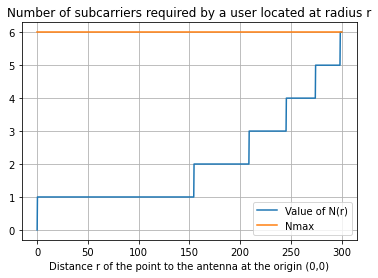

In [5]:
## Nmax

Nmax= math.ceil(C/(W*math.log2(1+SINRmin)))
print('Nmax = ',Nmax)

plt.figure()
plt.plot(Rad, Requests, label = 'Value of N(r)')
plt.plot(Rad, [Nmax]*len(Requests), label = 'Nmax')
plt.xlabel('Distance r of the point to the antenna at the origin (0,0)')
plt.title('Number of subcarriers required by a user located at radius r')
plt.legend()
plt.grid()
plt.show()

In [6]:
## Mean value of ζk : we compute it knowing the expectation of a 
## Poisson distribution is its parameter

# We start by finding the consecutive radius for the rings 
# We detect the jump by approximating the derivative of N(r)
Radius = [0]
n = 1000
for i in range(2,n):
    if N(i*300/n) - N((i-1)*300/n)>0:
        Radius =  Radius + [i*300/n]
Radius.append(R)

print('The consecutive radius are [r1, r2, r3, r4, r5, r6]: ',Radius)

# We compute the mean values as the paramters 
Mean_Values = []
for i in range(1,Nmax+1):
    Mean_Values.append(Lambda*np.pi*p*(Radius[i]**2 - Radius[i-1]**2))

print('The mean value of the ζk for k = 1, · · · , Nmax is : ', Mean_Values)

The consecutive radius are [r1, r2, r3, r4, r5, r6]:  [0, 154.8, 209.1, 245.7, 274.5, 298.8, 300]
The mean value of the ζk for k = 1, · · · , Nmax is :  [7.528211042167838, 6.207714826862397, 5.2293946002006555, 4.706658715384544, 4.376612415976361, 0.22574228171634747]


In [115]:
## Vector size that represents each distribution : Kμ

from scipy.optimize import fsolve

def size(mu):
    constant = -4*np.log(10)/mu + 1
    f = lambda x : x * (1-np.log(x)) - constant
    initial_guess = 2
    K = fsolve(f, initial_guess)
    return K[0]*mu ## according to the probability we computed, we assumed there was a typo and that the distribution is characterized with its K*μ first values

#Vector_Sizes = [size(mu) for mu in Mean_Values]
Vector_Sizes = [size(Mean_Values[i])*(i+1) for i in range(len(Mean_Values))]
print('The vector sizes for k = 1, · · · , Nmax are',Vector_Sizes)

K = math.ceil(max(Vector_Sizes))
print('The supremum of these dimensions is K =',K)
print("Remark : it's the value of the A1 Poisson random variable : it means that the distribution that is the most complex to sample is the one that is the closest to the antenna : which makes sense knowing that it's the most crowded")

The vector sizes for k = 1, · · · , Nmax are [22.083459618847204, 39.31776167857001, 53.345295443889405, 66.97130988855686, 80.35697152460276, 27.037333615932027]
The supremum of these dimensions is K = 81
Remark : it's the value of the A1 Poisson random variable : it means that the distribution that is the most complex to sample is the one that is the closest to the antenna : which makes sense knowing that it's the most crowded


In [116]:
## Vectors representing the distribution of the ζk s.

k = np.array([k for k in range(K+1)])
result = []

for i in range(Nmax):
    mu = Mean_Values[i]
    func = lambda x : np.exp(-mu) * mu**x / math.factorial(x)
    L = np.array([func(k) for k in range(K+1)])
    result.append(L)

$\mathbb{P}(iX_\mu = k) = \begin{cases}
    0 & \text{if k is not a multiple of i ie } k \% i \neq 0 \\
    \mathbb{P}(X_\mu = \frac{k}{i})  & \text{if k is not a multiple of i ie } k \% i = 0 \\
\end{cases}$

So we can build the vectors representing the distribution of the $k\zeta_k$ as follows

In [117]:
## Vectors representing the distribution of the k.ζk s

kresult = []

for i in range(Nmax):
    L = []
    for k in range(K+1):
        mu = Mean_Values[i]
        if k%(i+1) != 0 :
            L.append(0)
        else :
            L.append(result[i][k//(i+1)])
    kresult.append(L)

In [118]:
## numpy.convolve()

distribution = kresult[0]
for i in range(1,Nmax):
    distribution = np.convolve(distribution,kresult[i])
    
print(sum(distribution))

0.9999962858595166


____

### Question 10

$\mathbb{P}(F>S) < 0.01 \iff 1 - \mathbb{P}(F \le s) < 0.01 \iff \mathbb{P}(F \le s) > 0.99 \iff \sum_{k = 0}^{s}(\mathbb{P}(Distribution_F = k)) > 0.99$ 

In [124]:
summation = 0
k = 0
while summation <= 0.99 :
    print(k, summation)
    summation += distribution[k]
    k += 1
print(k)

0 0
1 5.255485176006432e-13
2 4.4819886709967435e-12
3 2.2636902221178177e-11
4 8.731684448850903e-11
5 2.833890889887293e-10
6 8.133705279790619e-10
7 2.1246923425235458e-09
8 5.1458668594866614e-09
9 1.1704676242221612e-08
10 2.5239517650462668e-08
11 5.1966646116162314e-08
12 1.0273357917095995e-07
13 1.958768318869172e-07
14 3.6150989684667937e-07
15 6.477973549909819e-07
16 1.1299214068147427e-06
17 1.9226155311046477e-06
18 3.1973220280942906e-06
19 5.205216178549215e-06
20 8.307520015074574e-06
21 1.3014688659440043e-05
22 2.003617578825109e-05
23 3.034255350647946e-05
24 4.524175514785277e-05
25 6.647110826777373e-05
26 9.63066104004394e-05
27 0.00013769055660853828
28 0.00019437814416585033
29 0.00027110305066984405
30 0.00037376121045824644
31 0.0005096111114484917
32 0.0006874879212335035
33 0.0009180276577348598
34 0.0012138964855859548
35 0.00159001909270014
36 0.0020637990364434115
37 0.0026553230041392447
38 0.003387540168361091
39 0.004286407292055917
40 0.0053809900053

There seems to be an issue with our distribution since it sums do 0.30
and thus never reaches 0.99. We commented the code because it does not execute (out of range error)

But had we been able to compute S, we would have concluded to a number of available cell that allows to reach a very small probability (0.01) of outage.